# ANN DA - Lab 1

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## 2.2 Implementation of the Delta rule

Setting up the variables

In [3]:
# Adding biais
def with_biais(mat):
    biais = np.ones(shape = (1,mat.shape[1]))
    mat_biais = np.concatenate((mat,biais), axis = 0)
    return(mat_biais)

# Initilaizing the weights
def initialize_weights(n_row, n_col):
    return(np.random.normal(size = (n_row,n_col)))

Defining Delta rule

In [4]:
def delta_rule(patterns, targets, weights, learning_rate):
    delta_weights = - learning_rate * ((weights @ patterns) - targets) @ patterns.T
    return(delta_weights)

def delta_rule_epochs(epochs, patterns, targets, weights, learning_rate = 0.001):
    new_weights = np.array(weights)
    for i in range(epochs):
        delta_weights = delta_rule(patterns, targets, new_weights, learning_rate)
        new_weights += delta_weights
    return(new_weights)

Test with some examples:

In [5]:
# Initializing patterns and targets (example of 'sign of x' problem)
patterns = np.array([[-1,1,-1,1],[-1,-1,1,1]])
patterns_biais = with_biais(patterns)
targets = np.array([-1,1,-1,1])
weights = initialize_weights(1,3)


print('We want to get targets: ', targets)
print('\nInitial random weights: ', weights)
print('Results with intial random weights: ', weights @ patterns_biais)

print('\n... Calculation of new weights for epochs = 20 and learning_rate = 0.001 ...')
new_weights_0001 = delta_rule_epochs(20, patterns_biais, targets, weights, learning_rate = 0.001)
print('New weights: ', new_weights_0001)
print('Result with new weights: ', new_weights_0001 @ patterns_biais)

print('\n... Calculation of new weights for epochs = 20 and learning_rate = 0.01 ...')
new_weights_001 = delta_rule_epochs(20, patterns_biais, targets, weights, learning_rate = 0.01)
print('New weights: ', new_weights_001)
print('Result with new weights: ', new_weights_001 @ patterns_biais)

We want to get targets:  [-1  1 -1  1]

Initial random weights:  [[-0.26165975 -0.92706101 -1.60135253]]
Results with intial random weights:  [[-0.41263177 -0.93595126 -2.26675379 -2.79007328]]

... Calculation of new weights for epochs = 20 and learning_rate = 0.001 ...
New weights:  [[-0.16447191 -0.85564789 -1.47799756]]
Result with new weights:  [[-0.45787776 -0.78682158 -2.16917355 -2.49811736]]

... Calculation of new weights for epochs = 20 and learning_rate = 0.01 ...
New weights:  [[ 0.44234332 -0.40976322 -0.70780171]]
Result with new weights:  [[-0.74038181  0.14430483 -1.55990826 -0.67522162]]


## 2.3 Implementation of a two-layer perceptron

In [6]:
def phi(x):
    return((np.divide(2,(1+np.exp(-x)))-1))

### 2.3.1 The forward  pass

### 2.3.2 The backward pass

### 2.3.3 Weights update

All together:

In [7]:
def fwd_bwd_wup(patterns, targets, weights, weights_hidden, eta, n_hidden, epochs, alpha):
    w = np.array(weights)
    v = np.array(weights_hidden)
    dw, dv = 0, 0
    patterns_biais = with_biais(patterns)
    for i in range(epochs):
        # forward pass
        h_in = w @ patterns_biais
        h_out = with_biais(phi(h_in))
        o_in = v @ h_out
        o_out = phi(o_in)

        # backward pass
        delta_o = (o_out-targets) * (1+o_out) * (1-o_out) * 0.5
        delta_h = (v.T @ delta_o) * ((1 + h_out) * (1 - h_out)) * 0.5
        delta_h = delta_h[range(n_hidden),:]

        # weights update
        dw = (dw * alpha) - (delta_h @ patterns_biais.T) * (1-alpha)
        dv = (dv * alpha) - (delta_o @ h_out.T) * (1-alpha)
        w += dw * eta
        v += dv * eta
        
    return(w,v)

Test with XOR example, n_hidden = 

In [8]:
patterns = np.array([[-1,1,-1,1],[-1,-1,1,1]])
targets = np.array([-1,1,1,-1])
n_hidden = 5

w = initialize_weights(n_row = n_hidden, n_col = 3)
v = initialize_weights(n_row = 1, n_col = n_hidden + 1)

def fast_forward(patterns, w, v):
    h_in = w @ with_biais(patterns)
    h_out = with_biais(phi(h_in))
    o_in = v @ h_out
    o_out = phi(o_in)
    return(o_out)

print('First output: \n')
print(fast_forward(patterns, w, v))

First output: 

[[ 0.63959267  0.32251669 -0.21556007 -0.6651798 ]]


In [9]:
new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
            eta = 0.01, n_hidden = n_hidden, epochs = 1000, alpha = 0.9)

In [10]:
print('After computation output: \n')
print(fast_forward(patterns, new_w, new_v))

After computation output: 

[[-0.72296927  0.75258797  0.72322781 -0.73928517]]


### 2.4 Monitoring the Learning Process

## 3. Assignment - Part 1

### 3.1 Classification with a single-layer perceptron

#### 3.1.1 Generation of linearly-separable data

In [11]:
def generate_points(n, m_A, m_B, sigma_A, sigma_B):
    class_A = np.array([np.random.randn(n)*sigma_A + m_A[0], np.random.randn(n)*sigma_A + m_A[1]]).T
    class_B = np.array([np.random.randn(n)*sigma_B + m_B[0], np.random.randn(n)*sigma_B + m_B[1]]).T

    # Shuffling
    dataset_ini = np.concatenate([class_A, class_B])
    classes_ini = np.array([1]*n+[-1]*n)
    seq = [i for i in range(len(dataset_ini))]
    np.random.shuffle(seq)
    dataset = dataset_ini[seq]
    classes = classes_ini[seq]
    return(dataset, classes)

dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [-2., -2.], sigma_A = 0.5, sigma_B = 0.5)

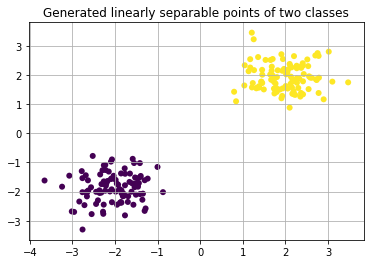

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

#### 3.1.2 Classifcation with a single-layer perceptron and analysis

In [13]:
def learning_perceptron(patterns, targets, weights, eta):
        delta_weights = - eta * (np.sign(weights @ patterns) - targets) @ patterns.T / 2
        return(delta_weights)
    
def learning_perceptron_epochs(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))/2))
        delta_weights = learning_perceptron(patterns, targets, new_weights, eta)
        new_weights += delta_weights
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

def delta_rule_2(patterns, targets, weights, eta):
    delta_weights = - eta * ((weights @ patterns) - targets) @ patterns.T
    return(delta_weights)

def delta_rule_epochs_2(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))/2))
        delta_weights = delta_rule_2(patterns, targets, new_weights, eta)
        new_weights += delta_weights
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

In [14]:
weights = initialize_weights(n_row = 1, n_col = 3)
eta = 0.001
dataset_biais = with_biais(np.transpose(dataset))

new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)

##### Plotting the animations

In [15]:
def from_Weights_List_To_Points(weights_list, x_lim_min, x_lim_max):
    y_min =  np.array(-weights_list[:,2]/weights_list[:,1] - x_lim_min*weights_list[:,0]/weights_list[:,1])
    y_max =  np.array(-weights_list[:,2]/weights_list[:,0] - x_lim_max*weights_list[:,0]/weights_list[:,1])
    x_min = np.array(x_lim_min*np.ones(len(y_min)))
    x_max = np.array(x_lim_max*np.ones(len(y_max)))
    return(x_min,x_max,y_min,y_max)

x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_lp, -5, 5)
x_min_dr, x_max_dr, y_min_dr, y_max_dr = from_Weights_List_To_Points(weights_list_dr, -5, 5)

In [16]:
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = 'C:/FFmpeg/bin/ffmpeg'

def animation_lines(x_min, x_max, y_min, y_max):
    fig, ax = plt.subplots()
    min_y = min(np.min(y_min), np.min(y_max))
    max_y = max(np.max(y_min), np.max(y_max))
    
    def animate(i):
        ax.clear()
        ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
        ax.set_xlim(left=x_min[0], right = x_max[0])
        ax.set_ylim(bottom=min_y, top = max_y)
        line = ax.plot([x_min[i], x_max[i]], [y_min[i], y_max[i]])  # update the data
        return line

    ani = animation.FuncAnimation(fig, animate, len(y_min), interval=1000, blit=True)
    return(HTML(ani.to_html5_video()))

For learning perceptron

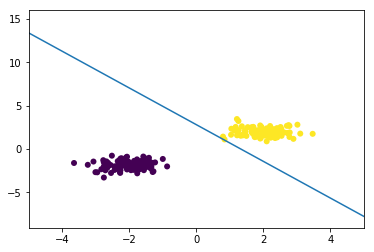

In [17]:
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

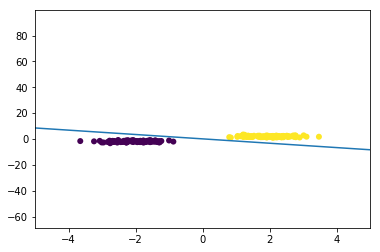

In [18]:
animation_lines(x_min_dr, x_max_dr, y_min_dr, y_max_dr)

##### Looking for the effect of eta

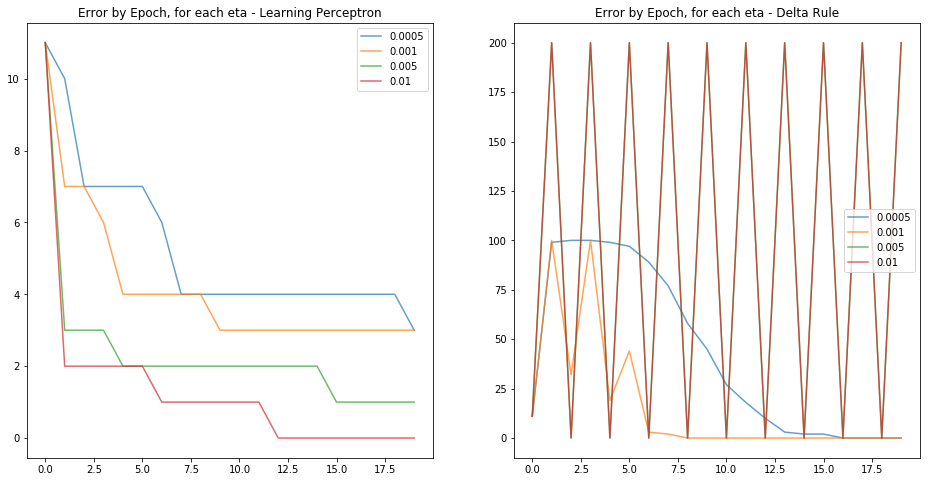

In [19]:
etas = [0.0005, 0.001 ,0.005, 0.01]

error_lp_list = []
error_dr_list = []

fig, axs = plt.subplots(1,2, figsize=(16, 8))

for eta in etas:
    new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    axs[0].plot([i for i in range(len(error_lp))], error_lp, label = eta, alpha = 0.7)
    axs[1].plot([i for i in range(len(error_dr))], error_dr, label = eta, alpha = 0.7)

axs[0].legend()
axs[0].set_title('Error by Epoch, for each eta - Learning Perceptron')
axs[1].legend()
axs[1].set_title('Error by Epoch, for each eta - Delta Rule')
plt.show()

##### Introducing the delta rule 1 by 1

In [20]:
def delta_rule_1by1(pattern, target, weights, eta):
    delta_weights = - eta * (sum([pattern[i]*weights[0,i] for i in range(len(pattern))] - target)) * pattern.T
    return(delta_weights)

def delta_rule_epochs_1by1(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        for j in range(len(patterns[0,:])):
            delta_weights = delta_rule_1by1(patterns[:,j], targets[j], new_weights, eta)
            new_weights += delta_weights
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))))
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

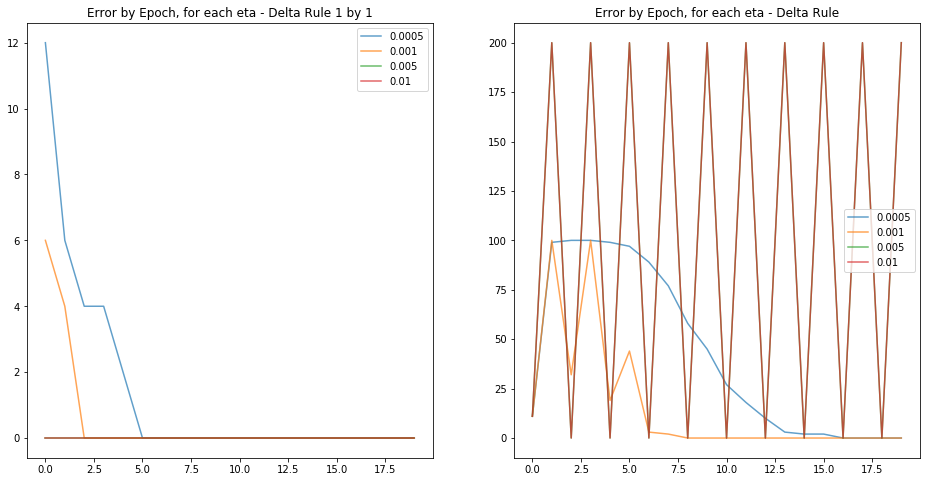

In [21]:
etas = [0.0005, 0.001 ,0.005, 0.01]
fig, axs = plt.subplots(1,2, figsize=(16, 8))

for eta in etas:
    new_weights_dr_1by1, error_1by1, weights_list_1by1 = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    axs[0].plot([i for i in range(len(error_1by1))], error_1by1, label = eta, alpha = 0.7)
    axs[1].plot([i for i in range(len(error_dr))], error_dr, label = eta, alpha = 0.7)

axs[0].legend()
axs[0].set_title('Error by Epoch, for each eta - Delta Rule 1 by 1')
axs[1].legend()
axs[1].set_title('Error by Epoch, for each eta - Delta Rule')
plt.show()

Sensitivity of sample to randomisation of input:

In [22]:
error_1by1_list = []

def first_to_0(x):
    for i in x:
        if i == 0:
            result = i
            break
    return(result)

for i in range(10):
    seq = [i for i in range(len(dataset_biais[0,:]))]
    np.random.shuffle(seq)
    dataset_biais2 = dataset_biais[:,seq]
    targets2 = classes[seq]
    
    new_weights_lp, error_lp, weights_list_lp = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais2,
                                                      targets=targets2,weights= weights,eta=eta)
    
    error_1by1_list.append(first_to_0(error_lp))
    
print(error_1by1_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##### Removing the biais

In [23]:
dataset, classes = generate_points(n = 100, m_A = [4., 4], m_B = [0, 0], sigma_A = 0.5, sigma_B = 0.5)
weights = initialize_weights(n_row = 1, n_col = 2)

new_weights_lp, error_lp, weights_list_lp = delta_rule_epochs_2(epochs = 20, patterns= dataset.T,
                                                      targets=targets2,weights= weights,eta=0.001)

In [24]:
error_lp

[93,
 104,
 93,
 105,
 96,
 105,
 95,
 105,
 95,
 105,
 95,
 105,
 95,
 105,
 95,
 105,
 95,
 105,
 95,
 105]

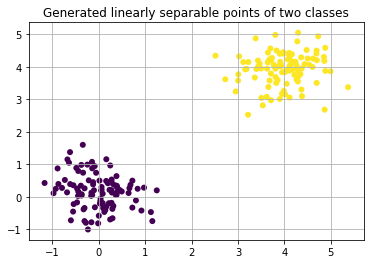

In [25]:
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

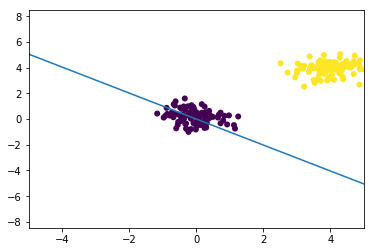

In [26]:
weights_list_biais_0 = np.concatenate([weights_list_lp.T,[np.zeros(len(weights_list_lp[:,0]))]]).T
x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_biais_0, -5, 5)
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

The problem is that in this case it has to pass by (0,0)

#### 3.1.3 Classifcation of samples that are not linearly separable

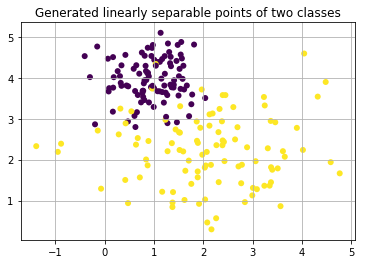

In [27]:
dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [1, 4], sigma_A = 1, sigma_B = 0.5)
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

In [28]:
weights = initialize_weights(n_row = 1, n_col = 3)
eta = 0.001
dataset_biais = with_biais(np.transpose(dataset))

new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
new_weights_dr_1by1, error_dr_1by1, weights_list_dr_1by1 = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)

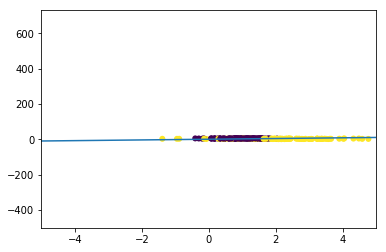

In [29]:
x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_dr_1by1, -5, 5)
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

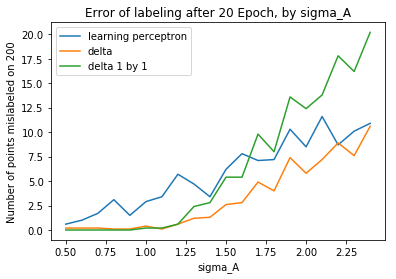

In [30]:
best_avg_lp, best_avg_dr, best_avg_dr_1by1 = [], [], []

for i in range(20):
    best_lp, best_dr, best_dr_1by1 = [], [], []
    for j in range(10):
        dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [-2, -2], sigma_A = 0.5+i/10, sigma_B = 0.5)
        weights = initialize_weights(n_row = 1, n_col = 3)
        eta = 0.001
        dataset_biais = with_biais(np.transpose(dataset))

        new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
        new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
        new_weights_dr_1by1, error_dr_1by1, weights_list_dr_1by1 = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
        best_lp.append(np.min(error_lp))
        best_dr.append(np.min(error_dr))
        best_dr_1by1.append(np.min(error_dr_1by1))
        
    best_avg_lp.append(np.mean(best_lp))
    best_avg_dr.append(np.mean(best_dr))
    best_avg_dr_1by1.append(np.mean(best_dr_1by1))

sigma_A_values = [0.5+i/10 for i in range(20)]
fig, ax = plt.subplots()
plt.plot(sigma_A_values, best_avg_lp, label = 'learning perceptron')
plt.plot(sigma_A_values, best_avg_dr, label = 'delta')
plt.plot(sigma_A_values, best_avg_dr_1by1, label = 'delta 1 by 1')
ax.legend()
ax.set_title('Error of labeling after 20 Epoch, by sigma_A')
ax.set_xlabel('sigma_A')
ax.set_ylabel('Number of points mislabeled on 200')
plt.show()


##### Second part with input given

In [31]:
n= 100
m_A, sigma_A = [1, 0.3], 0.2
m_B, sigma_B = [0, -0.1], 0.3
class_A = np.array([np.concatenate([np.random.randn(1,n//2)*sigma_A - m_A[0],np.random.randn(1,n//2)*sigma_A + m_A[0]], axis = 1)[0,:],
                    np.random.randn(n)*sigma_A + m_A[1]]).T
class_B = np.array([np.random.randn(n)*sigma_B + m_B[0], np.random.randn(n)*sigma_B + m_B[1]]).T

    # Shuffling
dataset_ini = np.concatenate([class_A, class_B])
classes_ini = np.array([1]*n+[-1]*n)
seq = [i for i in range(len(dataset_ini))]
np.random.shuffle(seq)
dataset = dataset_ini[seq]
classes = classes_ini[seq]

Last number of errors:  53


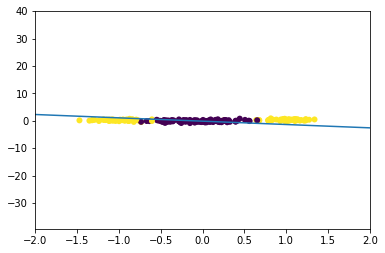

In [32]:
weights = initialize_weights(n_row = 1, n_col = 3)
eta = 0.001
dataset_biais = with_biais(np.transpose(dataset))

new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
print('Last number of errors: ',error_dr[-1])
x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_dr_1by1, -2, 2)
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

##### Several scenarios for sampling

Random 25% from each class

In [33]:
def performance_on_sampling(dataset, classes, iterations, seq, nn_fun):

    weights = initialize_weights(n_row = 1, n_col = 3)
    eta = 0.001

    error_avg_dr_1by1 = []

    for k in range(iterations):
        dataset_sampled = dataset[seq,:]
        dataset_biais_sampled = with_biais(np.transpose(dataset_sampled))
        classes_sampled = classes[seq]


        new_weights_dr_1by1, error_dr_1by1, weights_list_dr_1by1 = nn_fun(epochs = 20, patterns= dataset_biais_sampled,
                                                                  targets=classes_sampled,weights= weights,eta=eta)
        error_avg_dr_1by1.append(error_dr_1by1[-1])

    print('Median number of errors: ',np.median(error_avg_dr_1by1))

In [34]:
seq = np.random.choice([i for i in range(200)], 150, replace = False)
    
performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  80.0


Random 50% from class A

In [35]:
seq = np.concatenate([np.random.choice(np.where(classes==1)[0], 50, replace = False), np.where(classes!=1)[0]])

performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  100.0


Random 50% from class B

In [36]:
seq = np.concatenate([np.random.choice(np.where(classes==-1)[0], 50, replace = False), np.where(classes==1)[0]])

performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  100.0


20% of class_A < 0 and 80% of class_A > 0

In [37]:
cond_1 = np.where(dataset[:,0] > 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq1 = np.random.choice(cond, 40, replace = False)
    
cond_1 = np.where(dataset[:,0] <= 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq2 = np.random.choice(cond, 10, replace = False)
    
seq = np.concatenate([seq1, seq2, np.where(classes!=1)[0]])

performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  56.0


### 3.2 Classication and regression with a two-layer perceptron

#### 3.2.1 Classification of linearly non-separable data

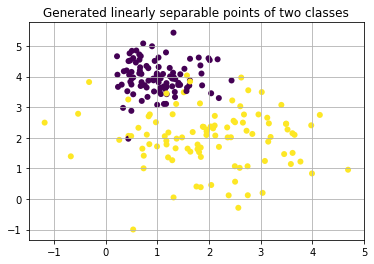

In [38]:
dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [1, 4], sigma_A = 1, sigma_B = 0.5)
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

In [39]:
def fwd_bwd_wup(patterns, targets, weights, weights_hidden, eta, n_hidden, epochs, alpha):
    w = np.array(weights)
    v = np.array(weights_hidden)
    dw, dv = 0, 0
    patterns_biais = with_biais(patterns)
    for i in range(epochs):
        # forward pass
        h_in = w @ patterns_biais
        h_out = with_biais(phi(h_in))
        o_in = v @ h_out
        o_out = phi(o_in)

        # backward pass
        delta_o = (o_out-targets) * (1+o_out) * (1-o_out) * 0.5
        delta_h = (v.T @ delta_o) * ((1 + h_out) * (1 - h_out)) * 0.5
        delta_h = delta_h[range(n_hidden),:]

        # weights update
        dw = (dw * alpha) - (delta_h @ patterns_biais.T) * (1-alpha)
        dv = (dv * alpha) - (delta_o @ h_out.T) * (1-alpha)
        w += dw * eta
        v += dv * eta
        
    return(w,v)

def fast_forward(patterns, w, v):
    h_in = w @ with_biais(patterns)
    h_out = with_biais(phi(h_in))
    o_in = v @ h_out
    o_out = phi(o_in)
    return(o_out)

def check_errors(patterns, classes, new_w, new_v):
    ans = fast_forward(patterns, new_w, new_v)
    error_label = int(np.sum(abs(np.sign(ans)-classes)/2))
    error_mean_square = np.sum((ans-classes)**2)
    return(error_label, error_mean_square)

def test_multi_layer(epochs_list, dataset, classes, n_hidden_list, test_dataset, test_classes):
    error_epoch_label_list, error_epoch_mean_square_list = [], []
    for epoch in epochs_list:
        error_avg_label_list, error_avg_mean_square_list = [], []
        for i in n_hidden_list:
            error_label_list, error_mean_square_list = [], []
            for j in range(10):
                n_hidden = i
                w = initialize_weights(n_row = n_hidden, n_col = 3)
                v = initialize_weights(n_row = 1, n_col = n_hidden + 1)

                new_w, new_v = fwd_bwd_wup(patterns = dataset.T, targets = classes, weights = w, weights_hidden = v,
                            eta = 0.001, n_hidden = n_hidden, epochs = epoch, alpha = 0.9)


                error_label, error_mean_square = check_errors(test_dataset.T, test_classes, new_w, new_v)
                error_label_list.append(error_label)
                error_mean_square_list.append(error_mean_square)

            error_avg_label_list.append(np.median(error_label_list))
            error_avg_mean_square_list.append(np.median(error_mean_square_list))

        error_epoch_label_list.append(error_avg_label_list)
        error_epoch_mean_square_list.append(error_avg_mean_square_list)
        
    return(error_epoch_label_list, error_epoch_mean_square_list)

In [40]:
epochs_list = [20, 100]
n_hidden_list = [i for i in range(1,11)]

error_epoch_label_list, error_epoch_mean_square_list = test_multi_layer(classes=classes, dataset=dataset,test_classes= classes, 
                                                                        test_dataset = dataset, epochs_list=epochs_list,
                                                                        n_hidden_list= n_hidden_list)

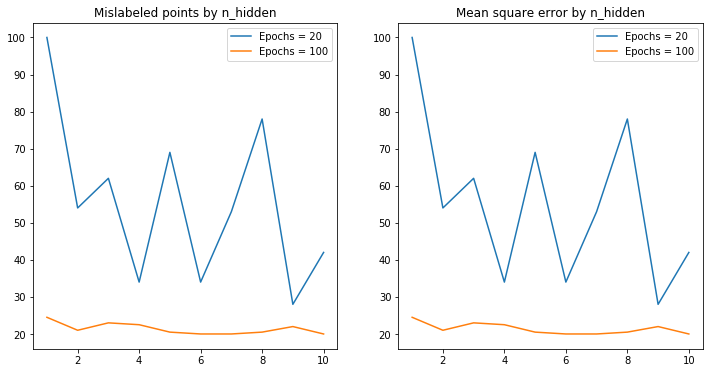

In [41]:
fig, axs = plt.subplots(1,2,figsize=(12, 6))
axs[0].plot(n_hidden_list, error_epoch_label_list[0], label='Epochs = 20')
axs[0].plot(n_hidden_list, error_epoch_label_list[1], label='Epochs = 100')
axs[0].set_title('Mislabeled points by n_hidden')
axs[0].legend()
axs[1].plot(n_hidden_list, error_epoch_label_list[0], label='Epochs = 20')
axs[1].plot(n_hidden_list, error_epoch_label_list[1], label='Epochs = 100')
axs[1].set_title('Mean square error by n_hidden')
axs[1].legend()
plt.show()

##### 2 Using the sampling again

In [42]:
n= 100
m_A, sigma_A = [1, 0.3], 0.2
m_B, sigma_B = [0, -0.1], 0.3
class_A = np.array([np.concatenate([np.random.randn(1,n//2)*sigma_A - m_A[0],np.random.randn(1,n//2)*sigma_A + m_A[0]], axis = 1)[0,:],
                    np.random.randn(n)*sigma_A + m_A[1]]).T
class_B = np.array([np.random.randn(n)*sigma_B + m_B[0], np.random.randn(n)*sigma_B + m_B[1]]).T

    # Shuffling
dataset_ini = np.concatenate([class_A, class_B])
classes_ini = np.array([1]*n+[-1]*n)
seq = [i for i in range(len(dataset_ini))]
np.random.shuffle(seq)
dataset = dataset_ini[seq]
classes = classes_ini[seq]

In [43]:
seq1 = np.random.choice([i for i in range(200)], 150, replace = False)
seq2 = np.concatenate([np.random.choice(np.where(classes==1)[0], 50, replace = False), np.where(classes!=1)[0]])
seq3 = np.concatenate([np.random.choice(np.where(classes==-1)[0], 50, replace = False), np.where(classes==1)[0]])
cond_1 = np.where(dataset[:,0] > 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq41 = np.random.choice(cond, 40, replace = False)
    
cond_1 = np.where(dataset[:,0] <= 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq42 = np.random.choice(cond, 10, replace = False)
    
seq4 = np.concatenate([seq41, seq42, np.where(classes!=1)[0]])

epochs_list = [20, 100]
n_hidden_list = [i for i in range(1,11)]

seqs = [seq1, seq2, seq3, seq4]

error_seq_label_list = []
error_seq_mean_square_list = []

for seq in seqs:
    train_dataset = dataset[seq,:]
    test_dataset = dataset[np.setdiff1d(np.array([i for i in range(200)]), seq),:]
    train_classes = classes[seq]
    test_classes = classes[np.setdiff1d(np.array([i for i in range(200)]), seq)]

    error_epoch_label_list, error_epoch_mean_square_list = test_multi_layer(classes= train_classes, dataset= train_dataset,
                                                                            test_classes= test_classes, 
                                                                            test_dataset = test_dataset, epochs_list=epochs_list,
                                                                            n_hidden_list= n_hidden_list)
    error_seq_label_list.append(error_epoch_label_list)
    error_seq_mean_square_list.append(error_epoch_mean_square_list)

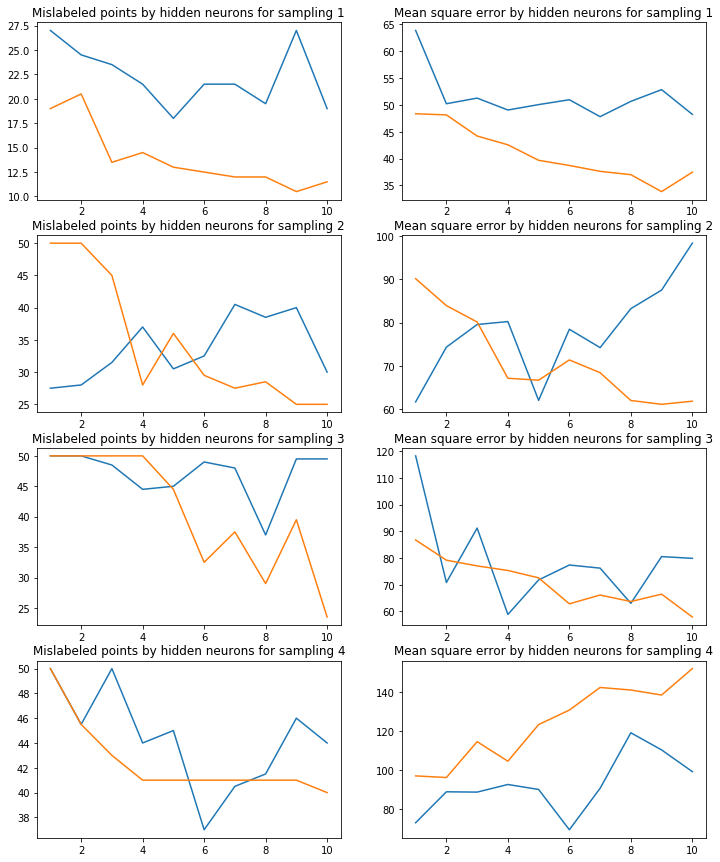

In [67]:
fig, axs = plt.subplots(4,2,figsize=(12, 15))
error_types = ['Mislabeled points', 'Mean square error']
errors = [error_seq_label_list, error_seq_mean_square_list]
for seq_i in range(4):
    for error_type in range(2):
        axs[seq_i, error_type].plot(n_hidden_list, errors[error_type][seq_i][0], label='Epochs = 20')
        axs[seq_i, error_type].plot(n_hidden_list, errors[error_type][seq_i][1], label='Epochs = 20')
        axs[seq_i, error_type].set_title(error_types[error_type]+' by hidden neurons for sampling '+str(seq_i+1))

Getting an idea of what is the classification made by the neural network:

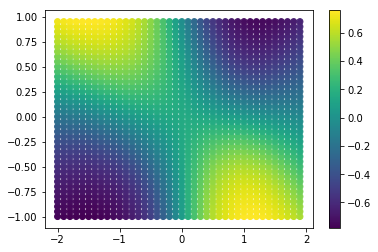

In [119]:
x, y = np.mgrid[slice(-2, 2, 0.1), slice(-1, 1, 0.05)]
x, y = np.concatenate(x), np.concatenate(y)
dataset_graph = np.array([x,y])
result = fast_forward(patterns=dataset_graph, v=new_v, w= new_w)

plt.scatter(dataset_graph[0,:], dataset_graph[1,:], c =result[0,:])
plt.colorbar()
plt.show()

#### 3.2.2 Encoder Problem

In [152]:
def check_errors_encoder(patterns, classes, new_w, new_v):
    ans = fast_forward(patterns, new_w, new_v)
    error = 8 - np.sum(np.sum(np.round(fast_forward(patterns, new_w, new_v))==targets, axis=0)==7)
    return(error)

In [187]:
n_hidden = 3
w = initialize_weights(n_row = n_hidden, n_col = 9)
v = initialize_weights(n_row = 8, n_col = n_hidden + 1)

patterns = np.array([[1,-1,-1,-1,-1,-1,-1,-1],[-1,1,-1,-1,-1,-1,-1,-1],[-1,-1,1,-1,-1,-1,-1,-1],[-1,-1,-1,1,-1,-1,-1,-1],
                    [-1,-1,-1,-1,1,-1,-1,-1],[-1,-1,-1,-1,-1,1,-1,-1],[-1,-1,-1,-1,-1,-1,1,-1],[-1,-1,-1,-1,-1,-1,-1,1]]).T
targets = patterns
new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                           eta = 0.001, n_hidden = n_hidden, epochs = 1000, alpha = 0.9)


To do: How does the internal code look, what does it represent? For that, you
can inspect the activations of the hidden layer corresponding to input
patterns. You could also examine the weight matrix for the rst layer.
Can you deduce anything from the sign of the weights?

In [189]:
np.round(new_w)

array([[-0., -1.,  0., -0.,  1., -1., -1., -0., -2.],
       [-0., -1., -1., -1., -2.,  0., -0., -1., -2.],
       [ 0., -0., -1.,  0., -1., -1., -1., -0.,  0.]])

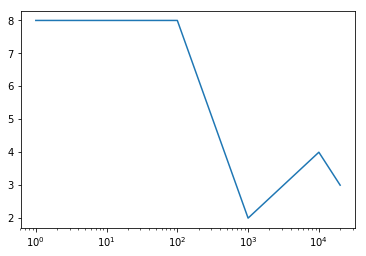

In [180]:
epochs = [1,10,50,100,1000, 10000, 20000]
error_list = []
for epoch in epochs:
    new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                           eta = 0.001, n_hidden = n_hidden, epochs = epoch, alpha = 0.9)
    error = check_errors_encoder(classes=targets, patterns=patterns, new_v=new_v, new_w = new_w)
    error_list.append(error)
plt.plot(epochs, error_list, 'o-')
plt.xscale('log')

We will take epoch = 1000 as a good compromise between accuracy and performance

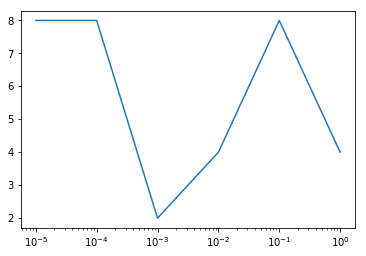

In [181]:
etas = [0.00001,0.0001,0.001,0.01,0.1,1]
error_list = []
for eta in etas:
    new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                           eta = eta, n_hidden = n_hidden, epochs = 1000, alpha = 0.9)
    error = check_errors_encoder(classes=targets, patterns=patterns, new_v=new_v, new_w = new_w)
    error_list.append(error)
plt.plot(etas, error_list, 'o-')
plt.xscale('log')

We will take eta = 0.001 which gives the best result

For n_hidden = 2:

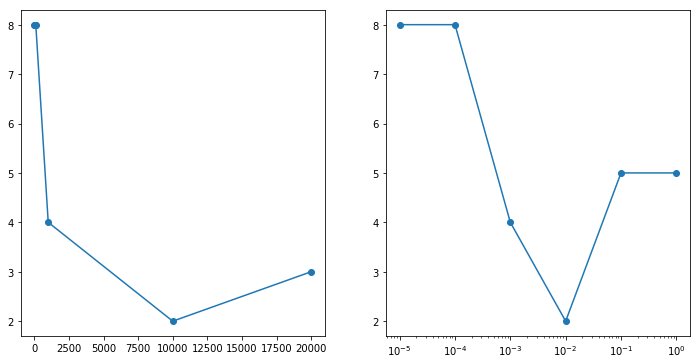

In [216]:
n_hidden = 2
w = initialize_weights(n_row = n_hidden, n_col = 9)
v = initialize_weights(n_row = 8, n_col = n_hidden + 1)

patterns = np.array([[1,-1,-1,-1,-1,-1,-1,-1],[-1,1,-1,-1,-1,-1,-1,-1],[-1,-1,1,-1,-1,-1,-1,-1],[-1,-1,-1,1,-1,-1,-1,-1],
                    [-1,-1,-1,-1,1,-1,-1,-1],[-1,-1,-1,-1,-1,1,-1,-1],[-1,-1,-1,-1,-1,-1,1,-1],[-1,-1,-1,-1,-1,-1,-1,1]]).T
targets = patterns

fig, axs = plt.subplots(1,2, figsize = [12,6])

epochs = [1,10,50,100,1000, 10000, 20000]
error_list = []
for epoch in epochs:
    new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                           eta = 0.001, n_hidden = n_hidden, epochs = epoch, alpha = 0.9)
    error = check_errors_encoder(classes=targets, patterns=patterns, new_v=new_v, new_w = new_w)
    error_list.append(error)
axs[0].plot(epochs, error_list, 'o-')
plt.xscale('log')

etas = [0.00001,0.0001,0.001,0.01,0.1,1]
error_list = []
for eta in etas:
    new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                           eta = eta, n_hidden = n_hidden, epochs = 1000, alpha = 0.9)
    error = check_errors_encoder(classes=targets, patterns=patterns, new_v=new_v, new_w = new_w)
    error_list.append(error)
axs[1].plot(etas, error_list, 'o-')
plt.xscale('log')

plt.show()

Auto encoder role: compression

### 3.3 Function approximation

#### 3.3.1 Generate function data

In [220]:
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return(np.exp(-(x**2+y**2)/10)-0.5)

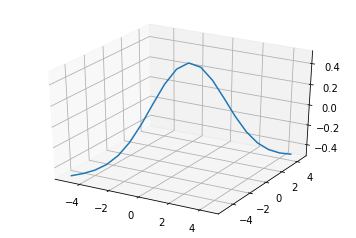

In [221]:
x = np.arange(-5,5,0.5)
y = np.arange(-5,5,0.5)
z = f(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

patterns = np.array([x,y])
targets = z

#### 3.3.2 Train the network and visualise the approximated function

In [222]:
def check_errors_ms(patterns, classes, new_w, new_v):
    ans = fast_forward(patterns, new_w, new_v)
    error_mean_square = np.sum((ans-classes)**2)
    return(error_mean_square)

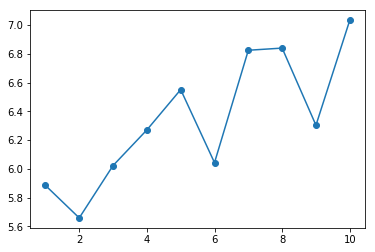

In [223]:
n_hidden_list = np.arange(1,11)
error_avg_list = []

for n_hidden in n_hidden_list:
    error_list = []
    for i in range(100):
        w = initialize_weights(n_row = n_hidden, n_col = 3)
        v = initialize_weights(n_row = 1, n_col = n_hidden + 1)
        new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                               eta = 0.001, n_hidden = n_hidden, epochs = 100, alpha = 0.9)
        error = check_errors_ms(classes=targets, patterns=patterns, new_v=new_v, new_w = new_w)
        error_list.append(error)
        
    error_avg_list.append(np.mean(error_list))
plt.plot(n_hidden_list, error_avg_list, 'o-')
plt.show()

We will take n_hidden = 3 which seems the most reasonable compromise between complexity and performance

In [278]:
# We redefine back propagate to have some more logs for the animation
def fwd_bwd_wup(patterns, targets, weights, weights_hidden, eta, n_hidden, epochs, alpha):
    w = np.array(weights)
    v = np.array(weights_hidden)
    dw, dv = 0, 0
    patterns_biais = with_biais(patterns)
    error_list = []
    weights_list = []
    for i in range(epochs):
        # forward pass
        h_in = w @ patterns_biais
        h_out = with_biais(phi(h_in))
        o_in = v @ h_out
        o_out = phi(o_in)

        # backward pass
        delta_o = (o_out-targets) * (1+o_out) * (1-o_out) * 0.5
        delta_h = (v.T @ delta_o) * ((1 + h_out) * (1 - h_out)) * 0.5
        delta_h = delta_h[range(n_hidden),:]

        # weights update
        dw = (dw * alpha) - (delta_h @ patterns_biais.T) * (1-alpha)
        dv = (dv * alpha) - (delta_o @ h_out.T) * (1-alpha)
        w += dw * eta
        v += dv * eta
        
        error_list.append(check_errors_ms(classes=targets, patterns=patterns, new_v= v, new_w = w))
        weights_list.append([np.array(w),np.array(v)])
        
    return(w,v, error_list, weights_list)

In [279]:
n_hidden = 3
w = initialize_weights(n_row = n_hidden, n_col = 3)
v = initialize_weights(n_row = 1, n_col = n_hidden + 1)
new_w, new_v, error_list, weights_list = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                               eta = 0.1, n_hidden = n_hidden, epochs = 100, alpha = 0.9)


w
[[ 1.31374474 -1.96961524 -1.84547259]
 [-0.16268528 -0.41073117  0.43430501]
 [ 0.48459623  0.26171714 -0.4295379 ]]
dw
 [[-0.00222853 -0.00222853  0.00177826]
 [ 0.00386986  0.00386986 -0.06244289]
 [ 0.00086798  0.00086798  0.01595505]]
w
[[ 1.31347282 -1.96988717 -1.84525564]
 [-0.16174512 -0.40979102  0.42252716]
 [ 0.48472035  0.26184126 -0.42659411]]
dw
 [[-0.00271928 -0.00271928  0.00216949]
 [ 0.00940157  0.00940157 -0.11777846]
 [ 0.00124117  0.00124117  0.02943797]]
w
[[ 1.31344904 -1.96991095 -1.84523655]
 [-0.15992958 -0.40797548  0.40595891]
 [ 0.48481126  0.26193218 -0.42261338]]
dw
 [[-0.0002378  -0.0002378   0.00019085]
 [ 0.01815538  0.01815538 -0.16568255]
 [ 0.00090913  0.00090913  0.03980725]]
w
[[ 1.31406332 -1.96929666 -1.84572778]
 [-0.15682582 -0.40487171  0.38540788]
 [ 0.48480501  0.26192593 -0.41797015]]
dw
 [[ 6.14289486e-03  6.14289486e-03 -4.91231467e-03]
 [ 3.10376598e-02  3.10376598e-02 -2.05510266e-01]
 [-6.24885809e-05 -6.24885809e-05  4.64323110e-0

In [281]:
predictions = [fast_forward(patterns=patterns,w = i[0], v = i[1]) for i in weights_list]

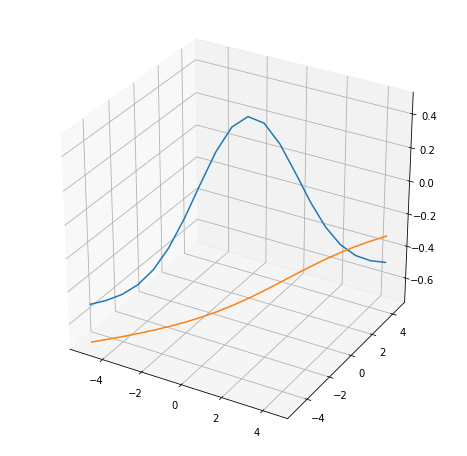

In [285]:
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = 'C:/FFmpeg/bin/ffmpeg'

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')
    #min_y = min(np.min(y_min), np.min(y_max))
    #max_y = max(np.max(y_min), np.max(y_max))
    
def animate(i):
    ax.clear()
    ax.plot(x, y, targets)
    ax.plot(x, y, predictions[i][0])
    return ax

ani = animation.FuncAnimation(fig, animate, len(predictions), interval=100, blit=False)
HTML(ani.to_html5_video())